# Module 7: Visualization 101 - Hands-On Titanic Data Visualization

Duration: 2 Hours

## Dataset: Titanic Dataset (Building on Previous Analytics Workflow)

## Learning Objectives

- Understand core visualization principles from Tufte and Gestalt psychology

- Master Matplotlib and Seaborn fundamentals

- Create effective visualizations for survival analysis

- Apply pre-attentive processing and color theory

- Avoid common visualization pitfalls

Building on Previous Workflow

### Let's continue from our Module 6 cleaned Titanic dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

print("=== Module 7: Visualization 101 - Titanic Data ===")
print("=== Building on Previous Analytics Workflow ===")

# Load our cleaned dataset from Module 6
# (Using the same cleaning workflow we established)
titanic_raw = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Replicate our cleaning pipeline from Module 6
df_clean = titanic_raw.copy()

# Age - Fill with median based on Pclass and Sex
age_median_by_group = df_clean.groupby(['Pclass', 'Sex'])['Age'].median()
def fill_age(row):
    if pd.isnull(row['Age']):
        return age_median_by_group[row['Pclass'], row['Sex']]
    return row['Age']
df_clean['Age'] = df_clean.apply(fill_age, axis=1)

# Embarked - Fill with mode
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

# Create features from Module 6
df_clean['Has_Cabin'] = df_clean['Cabin'].notnull().astype(int)
df_clean['Age_Group'] = pd.cut(df_clean['Age'], bins=[0, 12, 18, 35, 60, 100],
                              labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
df_clean['Fare_Category'] = pd.qcut(df_clean['Fare'], 4,
                                   labels=['Low', 'Medium', 'High', 'Very High'])
df_clean['Family_Size'] = df_clean['SibSp'] + df_clean['Parch'] + 1
df_clean['Is_Alone'] = (df_clean['Family_Size'] == 1).astype(int)

print(f" Cleaned dataset ready: {len(df_clean)} passengers, {len(df_clean.columns)} features")

=== Module 7: Visualization 101 - Titanic Data ===
=== Building on Previous Analytics Workflow ===
 Cleaned dataset ready: 891 passengers, 17 features


## Part 1: Visualization Fundamentals & Tufte's Principles

### 1.1 The Challenger Disaster Lesson


 PART 1: VISUALIZATION FUNDAMENTALS


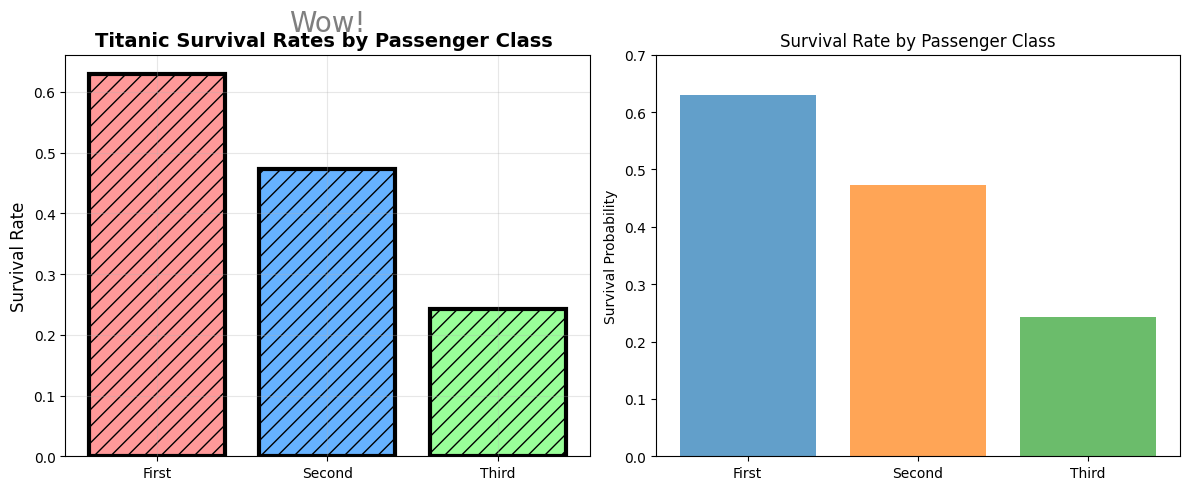


  TUFTE'S PRINCIPLES APPLIED:
• Data-Ink Ratio: Right plot maximizes ink used for data
• Chart Junk: Left plot has unnecessary grids, patterns, decorations
• Lie Factor: Both show same data, but left is visually misleading
• Clarity: Right plot communicates more clearly



In [3]:
# Demonstration of poor visualization vs effective visualization
# Simulating the Challenger O-ring data concept with our Titanic data

print("\n PART 1: VISUALIZATION FUNDAMENTALS")
print("=" * 50)

# Bad visualization example (violating Tufte's principles)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
# Example of "chart junk" - what NOT to do
survival_by_class = df_clean.groupby('Pclass')['Survived'].mean()
bars = plt.bar(['First', 'Second', 'Third'], survival_by_class.values,
               color=['#FF9999', '#66B2FF', '#99FF99'],
               edgecolor='black', linewidth=3)
plt.title('Titanic Survival Rates by Passenger Class ', fontsize=14, fontweight='bold')
plt.ylabel('Survival Rate', fontsize=12)
plt.grid(True, alpha=0.3)
# Adding unnecessary effects
for bar in bars:
    bar.set_hatch('//')
plt.text(1, 0.7, 'Wow!', fontsize=20, alpha=0.5, ha='center')

plt.subplot(1, 2, 2)
# Clean, Tufte-approved version
plt.bar(['First', 'Second', 'Third'], survival_by_class.values,
        color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
plt.title('Survival Rate by Passenger Class', fontsize=12)
plt.ylabel('Survival Probability')
plt.ylim(0, 0.7)

plt.tight_layout()
plt.show()

print("""
  TUFTE'S PRINCIPLES APPLIED:
• Data-Ink Ratio: Right plot maximizes ink used for data
• Chart Junk: Left plot has unnecessary grids, patterns, decorations
• Lie Factor: Both show same data, but left is visually misleading
• Clarity: Right plot communicates more clearly
""")

### 1.2 Anscombe's Quartet Lesson with Titanic Data


 ANSCOMBE'S QUARTET LESSON: Why Visualization Matters


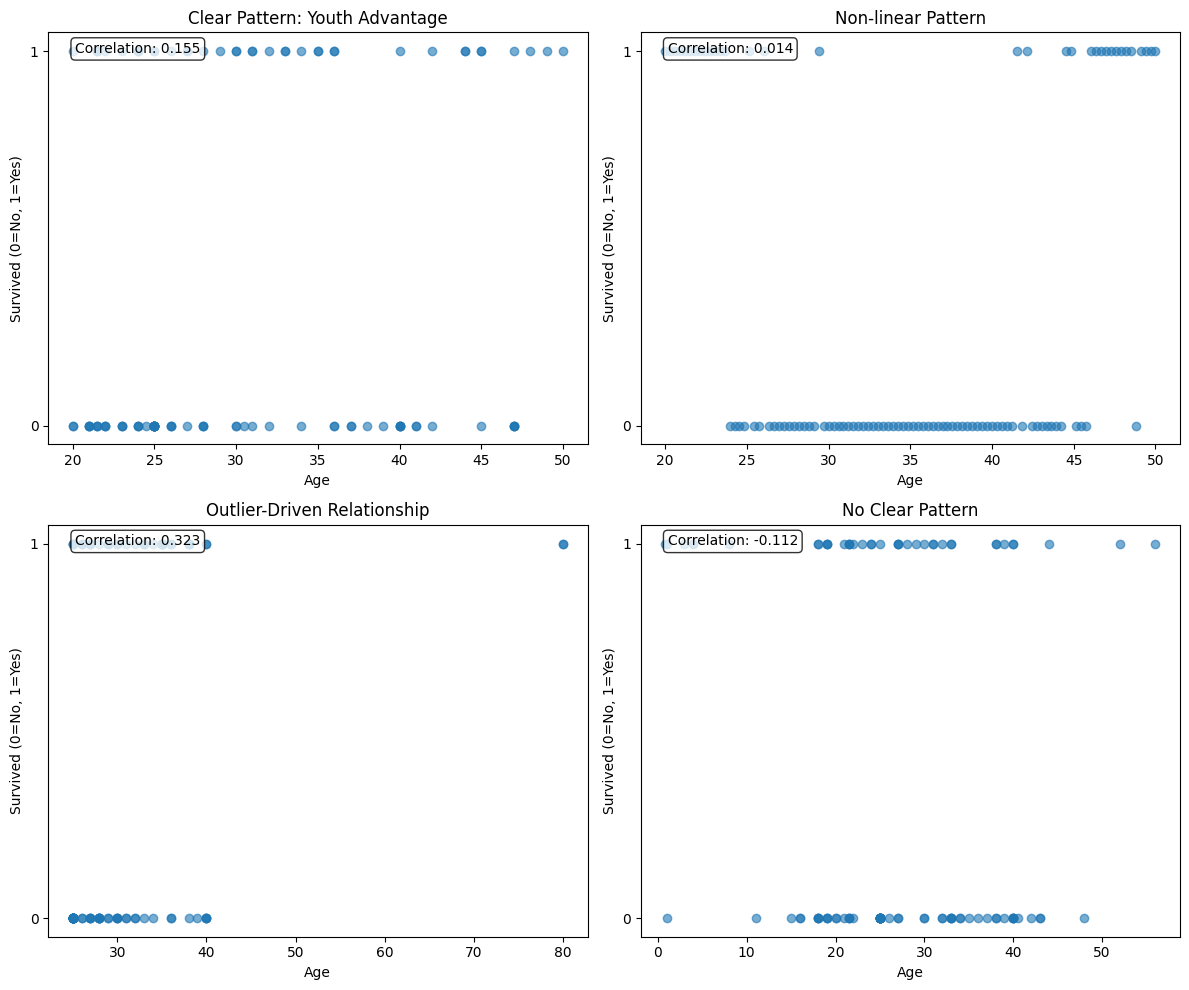


 KEY INSIGHT: 
Same correlation coefficients can hide completely different relationships!
Visualization reveals what statistics alone cannot.



In [4]:
# Demonstrating why visualization matters - same stats, different stories
print("\n ANSCOMBE'S QUARTET LESSON: Why Visualization Matters")
print("=" * 60)

# Create subsets with similar statistics but different distributions
np.random.seed(42)  # For reproducibility

# Create four different age-survival relationships with similar correlations
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Clear positive relationship (young survive, old don't)
age_subset1 = df_clean[(df_clean['Age'] >= 20) & (df_clean['Age'] <= 50)].sample(100, random_state=1)
axes[0,0].scatter(age_subset1['Age'], age_subset1['Survived'], alpha=0.6)
axes[0,0].set_title('Clear Pattern: Youth Advantage')
corr1 = np.corrcoef(age_subset1['Age'], age_subset1['Survived'])[0,1]
axes[0,0].text(0.05, 0.95, f'Correlation: {corr1:.3f}', transform=axes[0,0].transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Plot 2: Different pattern (middle-aged survival dip)
age_range = np.linspace(20, 50, 100)
survival_probs = 0.6 - 0.4 * np.sin((age_range - 20) * np.pi / 30)**2
noise = np.random.normal(0, 0.1, 100)
survival_simulated = np.clip(survival_probs + noise, 0, 1) > 0.5
axes[0,1].scatter(age_range, survival_simulated.astype(int), alpha=0.6)
axes[0,1].set_title('Non-linear Pattern')
corr2 = np.corrcoef(age_range, survival_simulated.astype(int))[0,1]
axes[0,1].text(0.05, 0.95, f'Correlation: {corr2:.3f}', transform=axes[0,1].transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Plot 3: Outlier-driven correlation
age_subset3 = df_clean[(df_clean['Age'] >= 25) & (df_clean['Age'] <= 40)].sample(98, random_state=2)
outliers = pd.DataFrame({'Age': [80, 80], 'Survived': [1, 1]})
age_subset3 = pd.concat([age_subset3[['Age', 'Survived']], outliers])
axes[1,0].scatter(age_subset3['Age'], age_subset3['Survived'], alpha=0.6)
axes[1,0].set_title('Outlier-Driven Relationship')
corr3 = np.corrcoef(age_subset3['Age'], age_subset3['Survived'])[0,1]
axes[1,0].text(0.05, 0.95, f'Correlation: {corr3:.3f}', transform=axes[1,0].transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Plot 4: No real relationship
age_subset4 = df_clean.sample(100, random_state=3)
axes[1,1].scatter(age_subset4['Age'], age_subset4['Survived'], alpha=0.6)
axes[1,1].set_title('No Clear Pattern')
corr4 = np.corrcoef(age_subset4['Age'], age_subset4['Survived'])[0,1]
axes[1,1].text(0.05, 0.95, f'Correlation: {corr4:.3f}', transform=axes[1,1].transAxes,
               bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

for ax in axes.flat:
    ax.set_xlabel('Age')
    ax.set_ylabel('Survived (0=No, 1=Yes)')
    ax.set_yticks([0, 1])

plt.tight_layout()
plt.show()

print("""
 KEY INSIGHT:
Same correlation coefficients can hide completely different relationships!
Visualization reveals what statistics alone cannot.
""")

## Part 2: Human Perception & Pre-Attentive Processing

### 2.1 Demonstrating Pre-Attentive Features


 PART 2: LEVERAGING HUMAN PERCEPTION


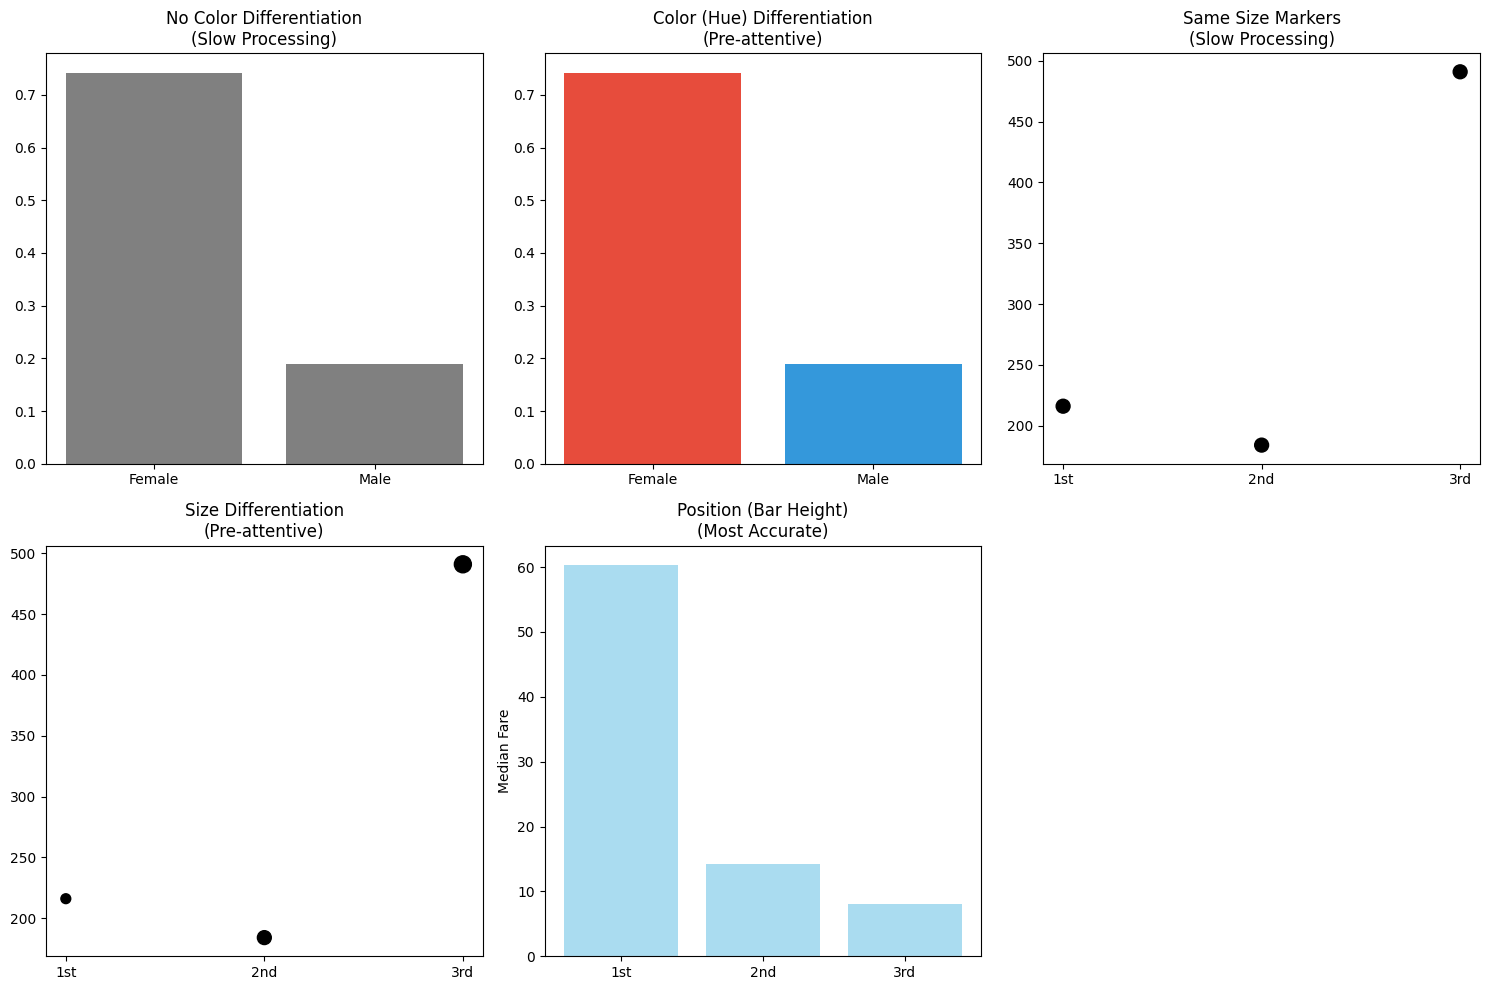


 PRE-ATTENTIVE PROCESSING:
• Color (Hue): Instantly distinguishes categories
• Size: Quickly shows magnitude differences  
• Position: Most accurate for quantitative comparisons
• Use these to help viewers process information faster!



In [5]:
print("\n PART 2: LEVERAGING HUMAN PERCEPTION")
print("=" * 45)

# Create side-by-side comparisons of pre-attentive features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Color (Hue) - Pre-attentive
survival_by_sex = df_clean.groupby('Sex')['Survived'].mean()
colors_bad = ['gray', 'gray']  # No differentiation
colors_good = ['#e74c3c', '#3498db']  # Clear color difference

axes[0,0].bar(['Female', 'Male'], survival_by_sex.values, color=colors_bad)
axes[0,0].set_title('No Color Differentiation\n(Slow Processing)')

axes[0,1].bar(['Female', 'Male'], survival_by_sex.values, color=colors_good)
axes[0,1].set_title('Color (Hue) Differentiation\n(Pre-attentive)')

# Size - Pre-attentive
pclass_counts = df_clean['Pclass'].value_counts().sort_index()
sizes_bad = [100, 100, 100]  # Same size
sizes_good = [50, 100, 150]  # Different sizes

axes[0,2].scatter(range(3), pclass_counts.values, s=sizes_bad, color='black')
axes[0,2].set_xticks(range(3))
axes[0,2].set_xticklabels(['1st', '2nd', '3rd'])
axes[0,2].set_title('Same Size Markers\n(Slow Processing)')

axes[1,0].scatter(range(3), pclass_counts.values, s=sizes_good, color='black')
axes[1,0].set_xticks(range(3))
axes[1,0].set_xticklabels(['1st', '2nd', '3rd'])
axes[1,0].set_title('Size Differentiation\n(Pre-attentive)')

# Position - Most accurate for quantitative comparison
fare_by_class = df_clean.groupby('Pclass')['Fare'].median()
axes[1,1].bar(['1st', '2nd', '3rd'], fare_by_class.values, color='skyblue', alpha=0.7)
axes[1,1].set_title('Position (Bar Height)\n(Most Accurate)')
axes[1,1].set_ylabel('Median Fare')

# Remove empty subplot
axes[1,2].axis('off')

plt.tight_layout()
plt.show()

print("""
 PRE-ATTENTIVE PROCESSING:
• Color (Hue): Instantly distinguishes categories
• Size: Quickly shows magnitude differences
• Position: Most accurate for quantitative comparisons
• Use these to help viewers process information faster!
""")

### 2.2 Gestalt Principles in Practice


 GESTALT PRINCIPLES APPLIED TO DATA VISUALIZATION


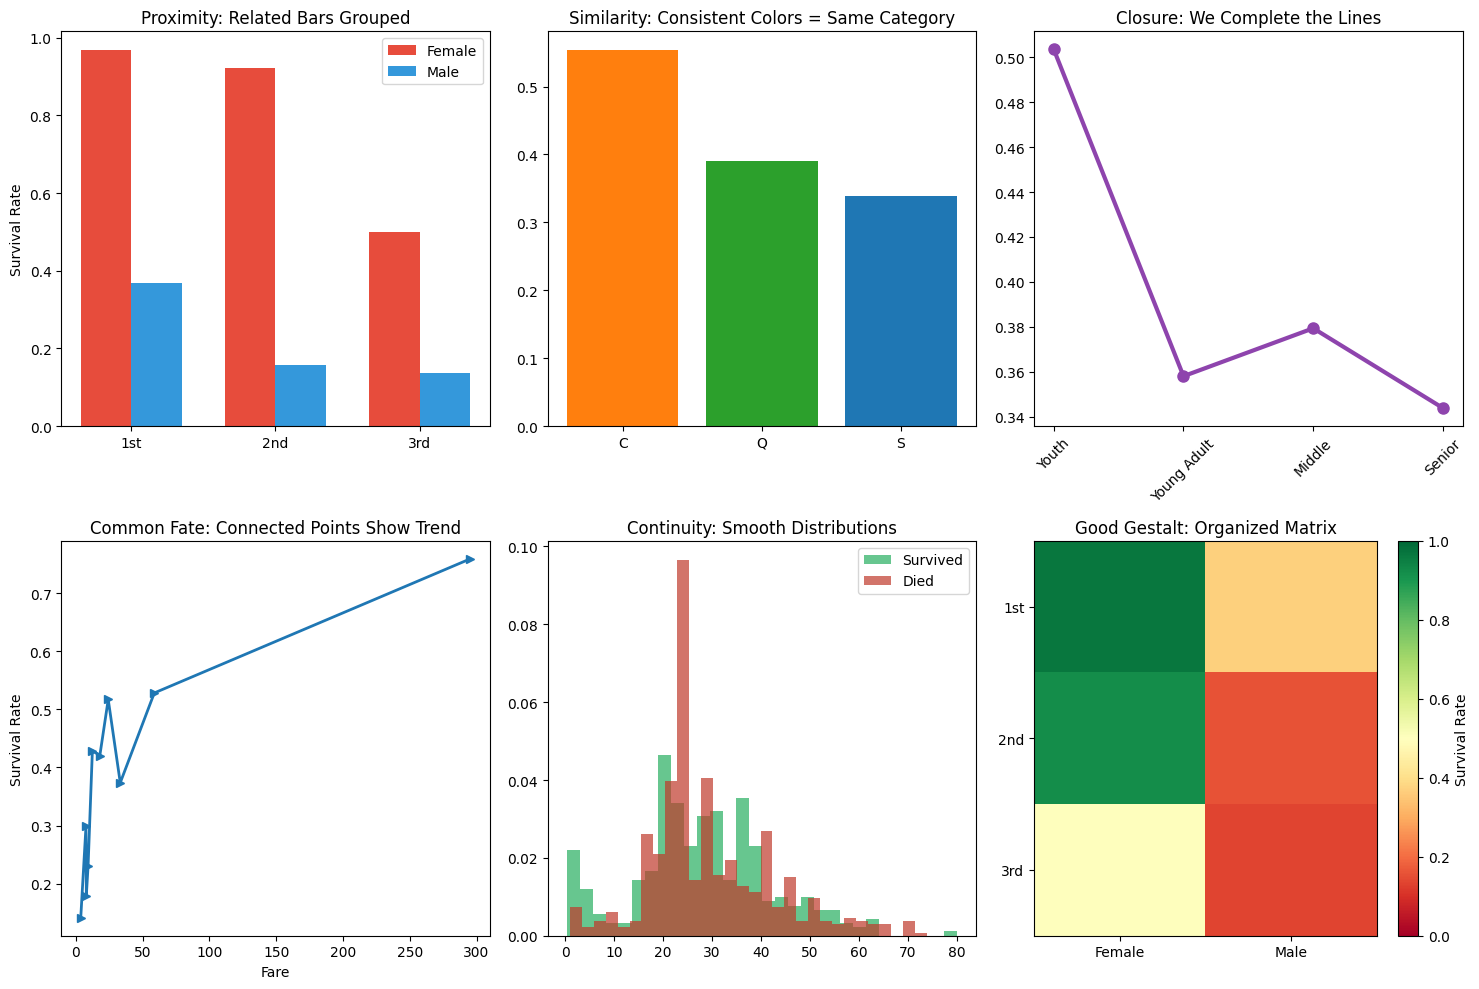

In [6]:
print("\n GESTALT PRINCIPLES APPLIED TO DATA VISUALIZATION")
print("=" * 55)

# Demonstrate Gestalt principles with Titanic data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Proximity - Group related elements
survival_by_class_sex = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
x_pos = np.arange(3)
width = 0.35

axes[0,0].bar(x_pos - width/2, survival_by_class_sex['female'], width, label='Female', color='#e74c3c')
axes[0,0].bar(x_pos + width/2, survival_by_class_sex['male'], width, label='Male', color='#3498db')
axes[0,0].set_xticks(x_pos)
axes[0,0].set_xticklabels(['1st', '2nd', '3rd'])
axes[0,0].set_title('Proximity: Related Bars Grouped')
axes[0,0].legend()
axes[0,0].set_ylabel('Survival Rate')

# 2. Similarity - Same color = same category
survival_by_embarked = df_clean.groupby('Embarked')['Survived'].mean()
colors = {'S': '#1f77b4', 'C': '#ff7f0e', 'Q': '#2ca02c'}  # Consistent colors
axes[0,1].bar(survival_by_embarked.index, survival_by_embarked.values,
              color=[colors[x] for x in survival_by_embarked.index])
axes[0,1].set_title('Similarity: Consistent Colors = Same Category')

# 3. Closure - We perceive complete shapes
age_bins = [0, 18, 35, 50, 100]
age_labels = ['Youth', 'Young Adult', 'Middle', 'Senior']
df_clean['Age_Category'] = pd.cut(df_clean['Age'], bins=age_bins, labels=age_labels)
survival_by_age_cat = df_clean.groupby('Age_Category')['Survived'].mean()

axes[0,2].plot(survival_by_age_cat.index, survival_by_age_cat.values, 'o-',
               linewidth=3, markersize=8, color='#8e44ad')
axes[0,2].set_title('Closure: We Complete the Lines')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Common Fate - Elements moving together
# Simulating survival probability over fare ranges
fare_bins = pd.qcut(df_clean['Fare'], 10)
fare_survival = df_clean.groupby(fare_bins)['Survived'].mean()
fare_midpoints = [interval.mid for interval in fare_survival.index]

axes[1,0].plot(fare_midpoints, fare_survival.values, '->', linewidth=2, markersize=6)
axes[1,0].set_title('Common Fate: Connected Points Show Trend')
axes[1,0].set_xlabel('Fare')
axes[1,0].set_ylabel('Survival Rate')

# 5. Continuity - We follow smooth paths
# Kernel Density Estimate shows continuous distribution
ages_survived = df_clean[df_clean['Survived'] == 1]['Age']
ages_died = df_clean[df_clean['Survived'] == 0]['Age']

axes[1,1].hist(ages_survived, bins=30, alpha=0.7, density=True, label='Survived', color='#27ae60')
axes[1,1].hist(ages_died, bins=30, alpha=0.7, density=True, label='Died', color='#c0392b')
axes[1,1].set_title('Continuity: Smooth Distributions')
axes[1,1].legend()

# 6. Good Gestalt - Simple, organized presentation
survival_rates = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
im = axes[1,2].imshow(survival_rates.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
axes[1,2].set_xticks([0, 1])
axes[1,2].set_xticklabels(['Female', 'Male'])
axes[1,2].set_yticks(range(3))
axes[1,2].set_yticklabels(['1st', '2nd', '3rd'])
axes[1,2].set_title('Good Gestalt: Organized Matrix')
plt.colorbar(im, ax=axes[1,2], label='Survival Rate')

plt.tight_layout()
plt.show()

## Part 3: Matplotlib & Seaborn Fundamentals

### 3.1 Basic Plot Types Comparison


 PART 3: MATPLOTLIB & SEABORN FUNDAMENTALS


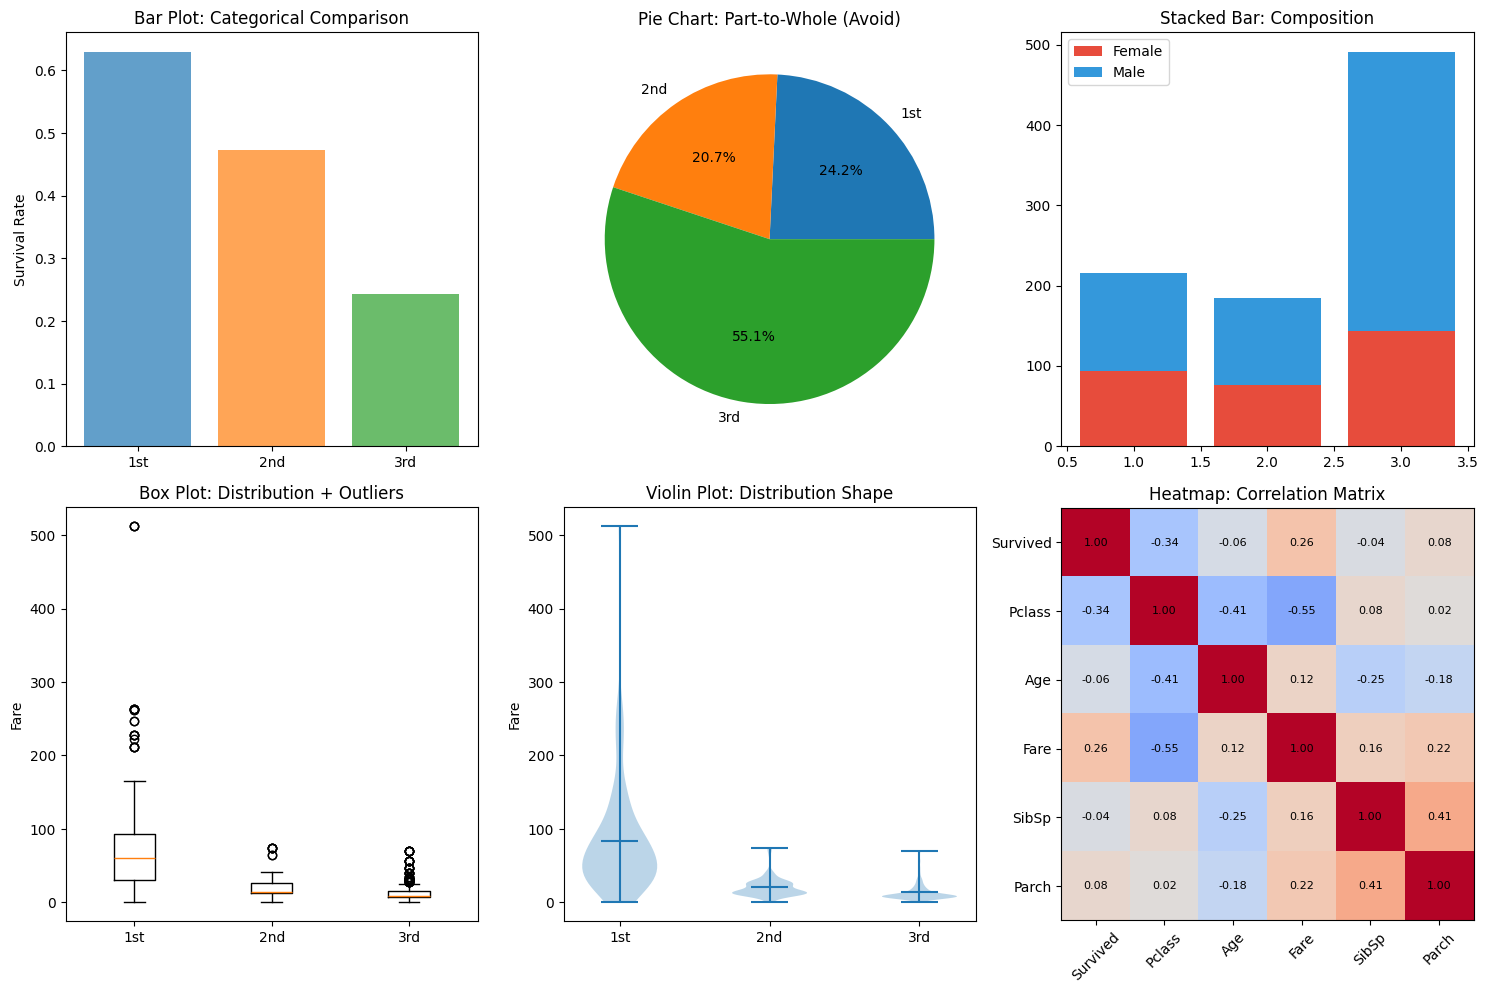


 PLOT TYPE GUIDELINES:
• Bar plots: Comparing categories
• Box/Violin plots: Showing distributions
• Heatmaps: Correlation patterns
• Avoid pie charts for precise comparisons
• Stacked bars for composition analysis



In [7]:
print("\n PART 3: MATPLOTLIB & SEABORN FUNDAMENTALS")
print("=" * 50)

# Compare different plot types for the same data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Data to visualize: Survival by passenger class
survival_by_class = df_clean.groupby('Pclass')['Survived'].mean()
counts_by_class = df_clean['Pclass'].value_counts().sort_index()

# 1. Bar Plot (Good for categorical comparisons)
axes[0,0].bar(['1st', '2nd', '3rd'], survival_by_class.values,
              color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
axes[0,0].set_title('Bar Plot: Categorical Comparison')
axes[0,0].set_ylabel('Survival Rate')

# 2. Pie Chart (Generally discouraged)
axes[0,1].pie(counts_by_class.values, labels=['1st', '2nd', '3rd'],
              autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0,1].set_title('Pie Chart: Part-to-Whole (Avoid)')

# 3. Stacked Bar (Shows composition)
class_sex_counts = df_clean.groupby(['Pclass', 'Sex']).size().unstack()
axes[0,2].bar(class_sex_counts.index, class_sex_counts['female'],
              label='Female', color='#e74c3c')
axes[0,2].bar(class_sex_counts.index, class_sex_counts['male'],
              bottom=class_sex_counts['female'], label='Male', color='#3498db')
axes[0,2].set_title('Stacked Bar: Composition')
axes[0,2].legend()

# 4. Box Plot (Distribution + outliers)
class_data = [df_clean[df_clean['Pclass'] == i]['Fare'] for i in range(1, 4)]
axes[1,0].boxplot(class_data, labels=['1st', '2nd', '3rd'])
axes[1,0].set_title('Box Plot: Distribution + Outliers')
axes[1,0].set_ylabel('Fare')

# 5. Violin Plot (Distribution shape)
axes[1,1].violinplot(class_data, showmeans=True)
axes[1,1].set_xticks([1, 2, 3])
axes[1,1].set_xticklabels(['1st', '2nd', '3rd'])
axes[1,1].set_title('Violin Plot: Distribution Shape')
axes[1,1].set_ylabel('Fare')

# 6. Heatmap (Correlation)
correlation_matrix = df_clean[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].corr()
im = axes[1,2].imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axes[1,2].set_xticks(range(len(correlation_matrix.columns)))
axes[1,2].set_xticklabels(correlation_matrix.columns, rotation=45)
axes[1,2].set_yticks(range(len(correlation_matrix.columns)))
axes[1,2].set_yticklabels(correlation_matrix.columns)
axes[1,2].set_title('Heatmap: Correlation Matrix')

# Add correlation values as text
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = axes[1,2].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.tight_layout()
plt.show()

print("""
 PLOT TYPE GUIDELINES:
• Bar plots: Comparing categories
• Box/Violin plots: Showing distributions
• Heatmaps: Correlation patterns
• Avoid pie charts for precise comparisons
• Stacked bars for composition analysis
""")

### 3.2 Survival vs Age, Gender, Fare - Comprehensive Analysis


 SURVIVAL ANALYSIS: Age, Gender, Fare Relationships


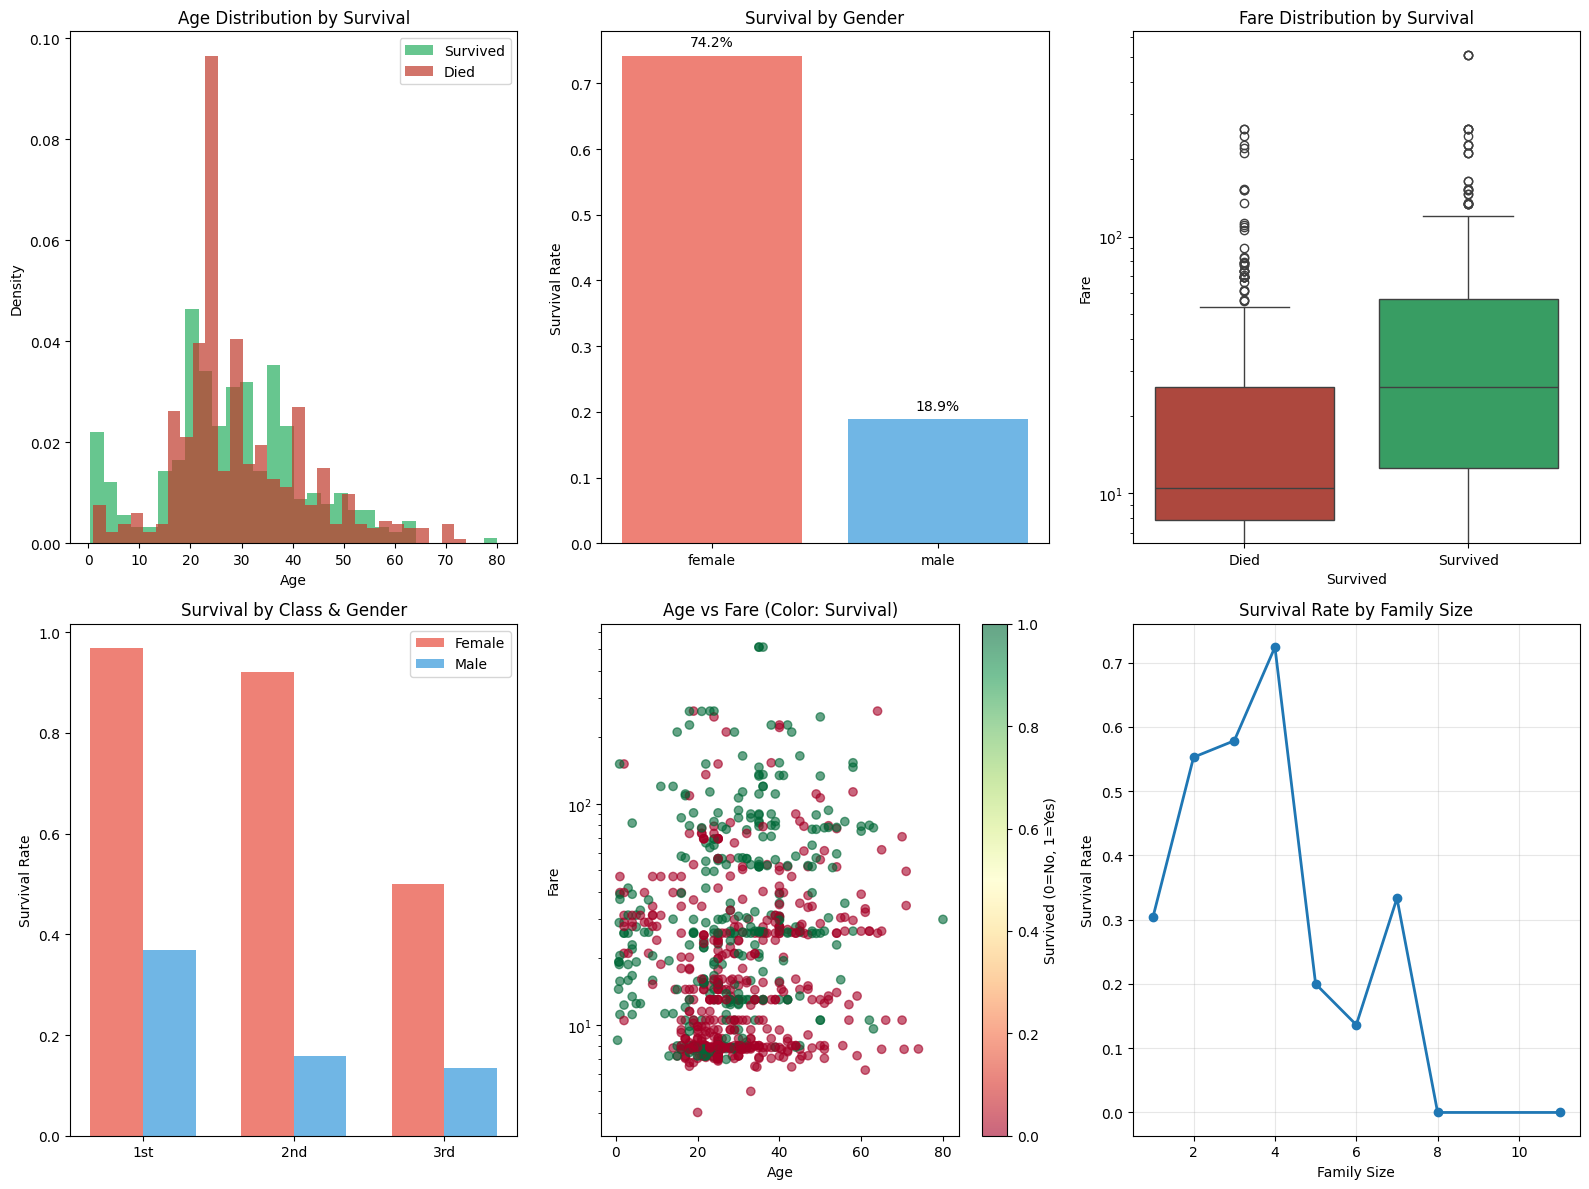

In [8]:
print("\n SURVIVAL ANALYSIS: Age, Gender, Fare Relationships")
print("=" * 55)

# Create a comprehensive survival analysis dashboard
fig = plt.figure(figsize=(16, 12))

# 1. Survival by Age Distribution
plt.subplot(2, 3, 1)
ages_survived = df_clean[df_clean['Survived'] == 1]['Age']
ages_died = df_clean[df_clean['Survived'] == 0]['Age']

plt.hist(ages_survived, bins=30, alpha=0.7, label='Survived', color='#27ae60', density=True)
plt.hist(ages_died, bins=30, alpha=0.7, label='Died', color='#c0392b', density=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival')
plt.legend()

# 2. Survival by Gender
plt.subplot(2, 3, 2)
survival_by_sex = df_clean.groupby('Sex')['Survived'].mean()
colors = ['#e74c3c', '#3498db']  # Consistent color scheme
bars = plt.bar(survival_by_sex.index, survival_by_sex.values, color=colors, alpha=0.7)
plt.ylabel('Survival Rate')
plt.title('Survival by Gender')
# Add value labels on bars
for bar, value in zip(bars, survival_by_sex.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.1%}', ha='center', va='bottom')

# 3. Survival by Fare
plt.subplot(2, 3, 3)
# Use seaborn for better fare distribution visualization
import seaborn as sns
sns.boxplot(data=df_clean, x='Survived', y='Fare', palette=['#c0392b', '#27ae60'])
plt.xticks([0, 1], ['Died', 'Survived'])
plt.title('Fare Distribution by Survival')
plt.yscale('log')  # Log scale due to fare outliers

# 4. Survival by Class and Gender (Interaction)
plt.subplot(2, 3, 4)
survival_pivot = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
x = np.arange(3)
width = 0.35
plt.bar(x - width/2, survival_pivot['female'], width, label='Female', color='#e74c3c', alpha=0.7)
plt.bar(x + width/2, survival_pivot['male'], width, label='Male', color='#3498db', alpha=0.7)
plt.xticks(x, ['1st', '2nd', '3rd'])
plt.ylabel('Survival Rate')
plt.title('Survival by Class & Gender')
plt.legend()

# 5. Age vs Fare colored by Survival
plt.subplot(2, 3, 5)
scatter = plt.scatter(df_clean['Age'], df_clean['Fare'],
                     c=df_clean['Survived'], alpha=0.6, cmap='RdYlGn')
plt.colorbar(scatter, label='Survived (0=No, 1=Yes)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare (Color: Survival)')
plt.yscale('log')

# 6. Survival by Family Size
plt.subplot(2, 3, 6)
survival_by_family = df_clean.groupby('Family_Size')['Survived'].mean()
plt.plot(survival_by_family.index, survival_by_family.values, 'o-', linewidth=2, markersize=6)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Part 4: Color Theory & Accessibility

### 4.1 Color Choices Matter



 PART 4: COLOR THEORY & ACCESSIBILITY


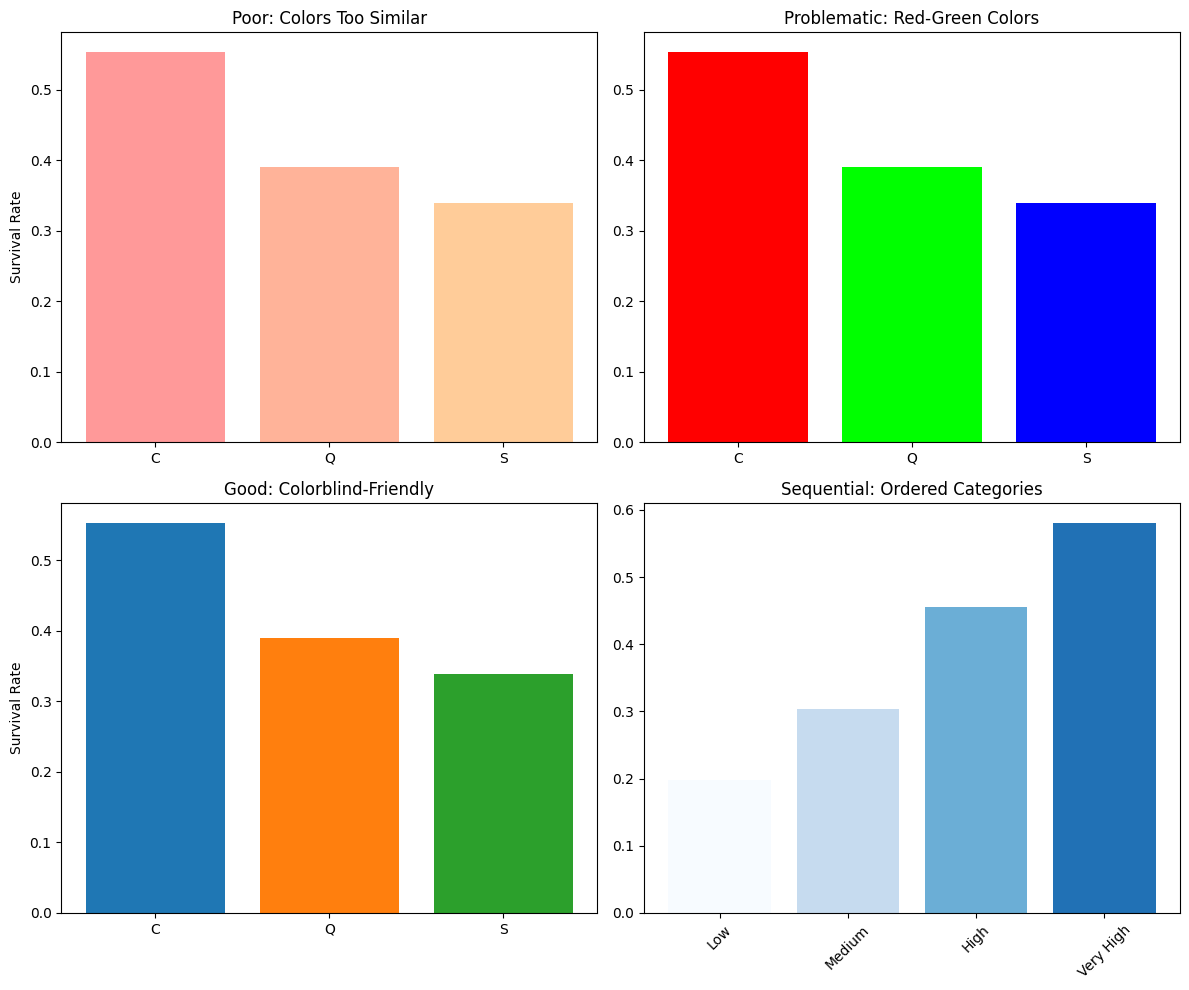


  COLOR GUIDELINES:
• Use colorbrewer2.org for safe palettes
• Avoid red-green combinations (10% males colorblind)
• Use sequential colors for ordered data
• Use qualitative colors for categorical data
• Ensure sufficient contrast



In [9]:
print("\n PART 4: COLOR THEORY & ACCESSIBILITY")
print("=" * 45)

# Demonstrate good vs bad color choices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Data: Survival by multiple categories
survival_by_embarked = df_clean.groupby('Embarked')['Survived'].mean()

# 1. Bad color choices - indistinguishable
axes[0,0].bar(survival_by_embarked.index, survival_by_embarked.values,
              color=['#FF9999', '#FFB399', '#FFCC99'])  # Too similar
axes[0,0].set_title('Poor: Colors Too Similar')
axes[0,0].set_ylabel('Survival Rate')

# 2. Colorblind-unfriendly (red-green)
axes[0,1].bar(survival_by_embarked.index, survival_by_embarked.values,
              color=['#FF0000', '#00FF00', '#0000FF'])  # Red-green problematic
axes[0,1].set_title('Problematic: Red-Green Colors')

# 3. Good: Colorblind-friendly palette
axes[1,0].bar(survival_by_embarked.index, survival_by_embarked.values,
              color=['#1f77b4', '#ff7f0e', '#2ca02c'])  # Colorblind safe
axes[1,0].set_title('Good: Colorblind-Friendly')
axes[1,0].set_ylabel('Survival Rate')

# 4. Sequential colors for ordered data
fare_survival = df_clean.groupby('Fare_Category')['Survived'].mean()
colors_sequential = ['#f7fbff', '#c6dbef', '#6baed6', '#2171b5']  # Light to dark
axes[1,1].bar(fare_survival.index, fare_survival.values, color=colors_sequential)
axes[1,1].set_title('Sequential: Ordered Categories')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("""
  COLOR GUIDELINES:
• Use colorbrewer2.org for safe palettes
• Avoid red-green combinations (10% males colorblind)
• Use sequential colors for ordered data
• Use qualitative colors for categorical data
• Ensure sufficient contrast
""")

### 4.2 Final Comprehensive Dashboard


 FINAL COMPREHENSIVE TITANIC DASHBOARD


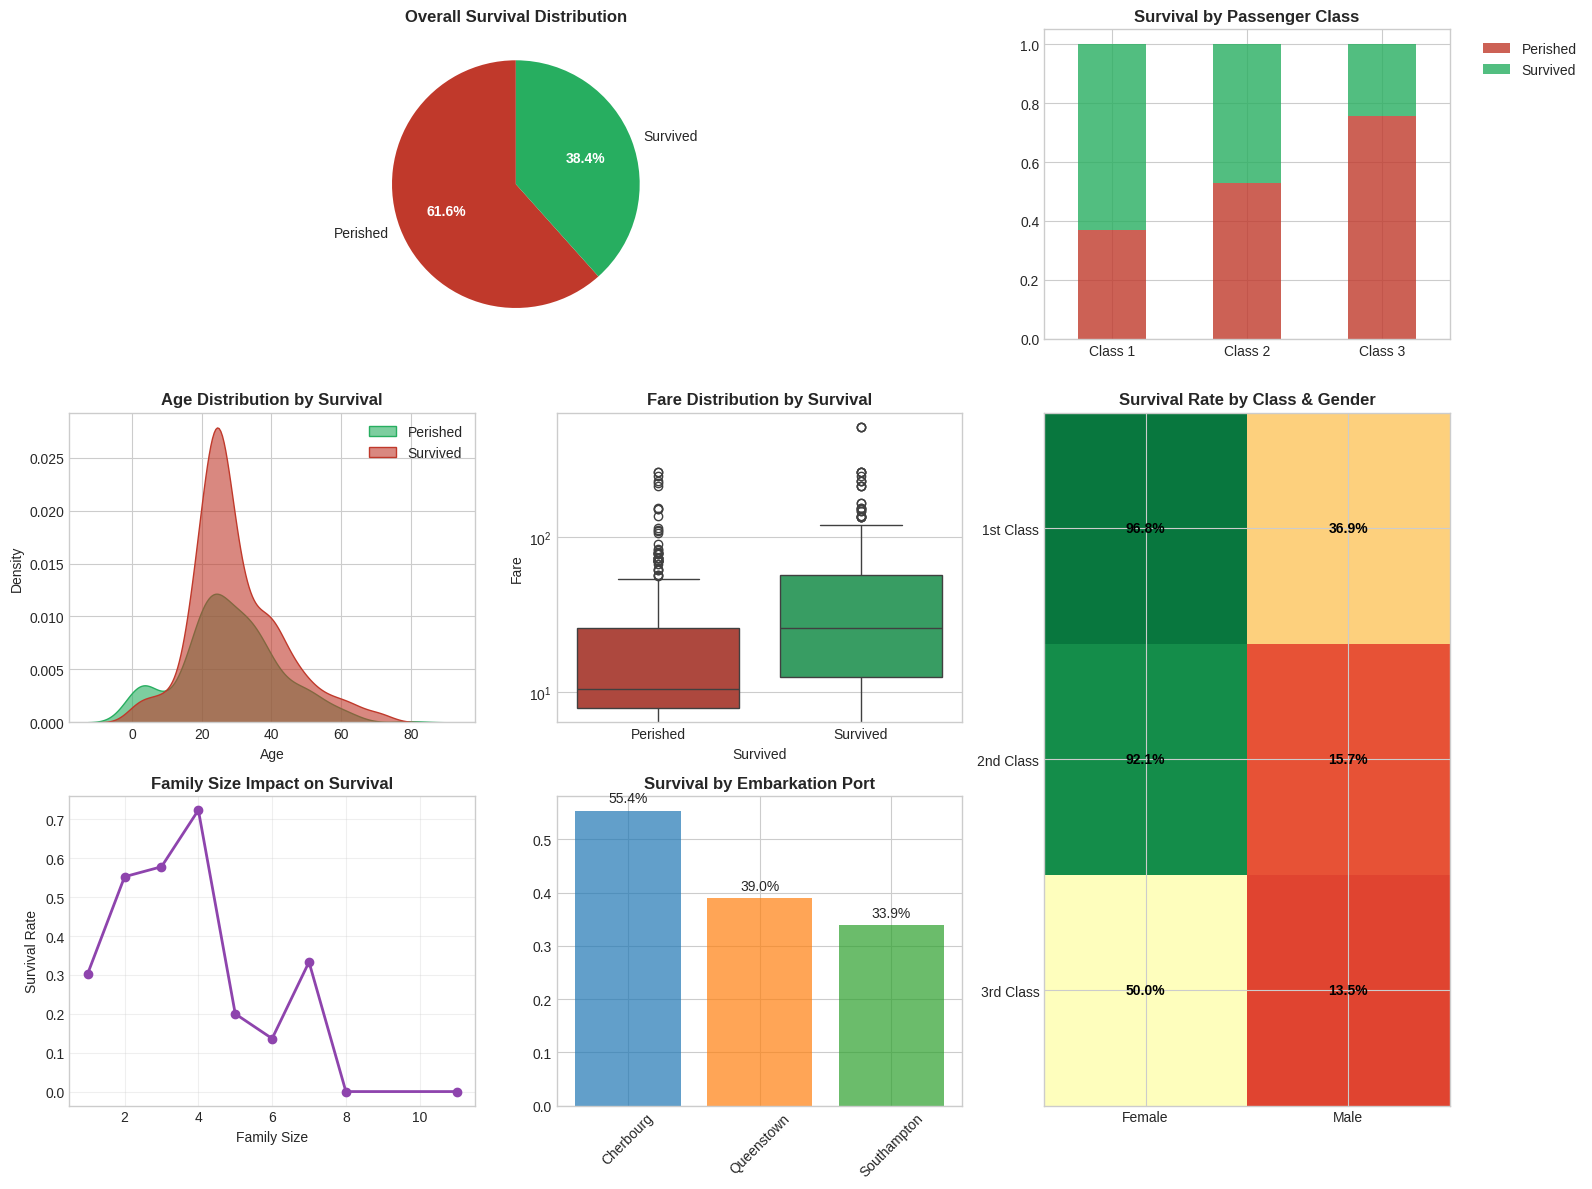


 VISUALIZATION BEST PRACTICES APPLIED:
• Tufte's data-ink ratio maximized
• Colorblind-friendly palettes
• Clear labels and titles
• Appropriate chart types for each question
• Gestalt principles for visual organization
• Pre-attentive processing leveraged
• No chart junk or misleading elements



In [10]:
print("\n FINAL COMPREHENSIVE TITANIC DASHBOARD")
print("=" * 45)

# Create a publication-ready comprehensive visualization
plt.style.use('seaborn-v0_8-whitegrid')  # Clean, professional style
fig = plt.figure(figsize=(16, 12))

# Define color palette
colors = {'survived': '#27ae60', 'died': '#c0392b',
          'female': '#e74c3c', 'male': '#3498db'}

# 1. Main survival overview
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
survival_counts = df_clean['Survived'].value_counts()
wedges, texts, autotexts = ax1.pie(survival_counts.values,
                                   labels=['Perished', 'Survived'],
                                   autopct='%1.1f%%',
                                   colors=[colors['died'], colors['survived']],
                                   startangle=90)
# Improve pie chart readability
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax1.set_title('Overall Survival Distribution', fontweight='bold')

# 2. Survival by class with proper formatting
ax2 = plt.subplot2grid((3, 3), (0, 2))
class_data = []
class_labels = []
for pclass in sorted(df_clean['Pclass'].unique()):
    survived = df_clean[df_clean['Pclass'] == pclass]['Survived'].mean()
    died = 1 - survived
    class_data.append([died, survived])
    class_labels.append(f'Class {pclass}')

class_df = pd.DataFrame(class_data, index=class_labels, columns=['Perished', 'Survived'])
class_plot = class_df.plot(kind='bar', stacked=True, ax=ax2,
                          color=[colors['died'], colors['survived']], alpha=0.8)
ax2.set_title('Survival by Passenger Class', fontweight='bold')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=0)

# 3. Age distribution by survival
ax3 = plt.subplot2grid((3, 3), (1, 0))
sns.kdeplot(data=df_clean, x='Age', hue='Survived', ax=ax3,
            palette=[colors['died'], colors['survived']], fill=True, alpha=0.6)
ax3.set_title('Age Distribution by Survival', fontweight='bold')
ax3.legend(['Perished', 'Survived'])

# 4. Fare distribution
ax4 = plt.subplot2grid((3, 3), (1, 1))
sns.boxplot(data=df_clean, x='Survived', y='Fare', ax=ax4,
            palette=[colors['died'], colors['survived']])
ax4.set_xticks([0, 1])
ax4.set_xticklabels(['Perished', 'Survived'])
ax4.set_yscale('log')
ax4.set_title('Fare Distribution by Survival', fontweight='bold')

# 5. Gender and class interaction
ax5 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
survival_heatmap_data = df_clean.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
im = ax5.imshow(survival_heatmap_data.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)
ax5.set_xticks([0, 1])
ax5.set_xticklabels(['Female', 'Male'])
ax5.set_yticks(range(3))
ax5.set_yticklabels(['1st Class', '2nd Class', '3rd Class'])
ax5.set_title('Survival Rate by Class & Gender', fontweight='bold')

# Add values to heatmap
for i in range(survival_heatmap_data.shape[0]):
    for j in range(survival_heatmap_data.shape[1]):
        text = ax5.text(j, i, f'{survival_heatmap_data.iloc[i, j]:.1%}',
                       ha="center", va="center", color="black", fontweight='bold')

# 6. Family size impact
ax6 = plt.subplot2grid((3, 3), (2, 0))
family_survival = df_clean.groupby('Family_Size')['Survived'].mean()
ax6.plot(family_survival.index, family_survival.values, 'o-',
         color='#8e44ad', linewidth=2, markersize=6)
ax6.set_xlabel('Family Size')
ax6.set_ylabel('Survival Rate')
ax6.set_title('Family Size Impact on Survival', fontweight='bold')
ax6.grid(True, alpha=0.3)

# 7. Embarkation port
ax7 = plt.subplot2grid((3, 3), (2, 1))
embark_survival = df_clean.groupby('Embarked')['Survived'].mean()
ports = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
embark_survival.index = [ports.get(x, x) for x in embark_survival.index]
bars = ax7.bar(embark_survival.index, embark_survival.values,
               color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
ax7.set_title('Survival by Embarkation Port', fontweight='bold')
ax7.tick_params(axis='x', rotation=45)

# Add value labels
for bar, value in zip(bars, embark_survival.values):
    ax7.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("""
 VISUALIZATION BEST PRACTICES APPLIED:
• Tufte's data-ink ratio maximized
• Colorblind-friendly palettes
• Clear labels and titles
• Appropriate chart types for each question
• Gestalt principles for visual organization
• Pre-attentive processing leveraged
• No chart junk or misleading elements
""")

### Summary & Key Takeaways


In [11]:
print("\n MODULE 7: KEY TAKEAWAYS")
print("=" * 40)

key_insights = [
    " VISUALIZATION PRINCIPLES:",
    "  • Tufte: Maximize data-ink ratio, minimize chart junk",
    "  • Gestalt: Use proximity, similarity, closure for organization",
    "  • Pre-attentive: Leverage color, size, position for quick processing",
    "",
    " EFFECTIVE CHART SELECTION:",
    "  • Bar charts: Categorical comparisons",
    "  • Histograms/KDE: Distribution visualization",
    "  • Scatter plots: Relationship exploration",
    "  • Box/Violin plots: Distribution + outliers",
    "  • Heatmaps: Correlation patterns",
    "",
    " COLOR & ACCESSIBILITY:",
    "  • Use colorbrewer2.org for safe palettes",
    "  • Avoid red-green combinations (10% males colorblind)",
    "  • Sequential colors for ordered data",
    "  • Qualitative colors for categories",
    "",
    " COMMON PITFALLS TO AVOID:",
    "  • Pie charts for precise comparisons",
    "  • 3D effects that distort perception",
    "  • Misleading scales or truncated axes",
    "  • Overly complex or cluttered designs",
    "",
    " TITANIC SPECIFIC INSIGHTS:",
    f"  • Overall survival: {df_clean['Survived'].mean():.1%}",
    f"  • Gender gap: Females {df_clean[df_clean.Sex=='female']['Survived'].mean():.1%} vs Males {df_clean[df_clean.Sex=='male']['Survived'].mean():.1%}",
    f"  • Class disparity: 1st class {df_clean[df_clean.Pclass==1]['Survived'].mean():.1%} vs 3rd class {df_clean[df_clean.Pclass==3]['Survived'].mean():.1%}"
]

for insight in key_insights:
    print(insight)

print(f"\n MODULE 7 COMPLETE! Ready for Module 8: Fixing Visualization Issues")


 MODULE 7: KEY TAKEAWAYS
 VISUALIZATION PRINCIPLES:
  • Tufte: Maximize data-ink ratio, minimize chart junk
  • Gestalt: Use proximity, similarity, closure for organization
  • Pre-attentive: Leverage color, size, position for quick processing

 EFFECTIVE CHART SELECTION:
  • Bar charts: Categorical comparisons
  • Histograms/KDE: Distribution visualization
  • Scatter plots: Relationship exploration
  • Box/Violin plots: Distribution + outliers
  • Heatmaps: Correlation patterns

 COLOR & ACCESSIBILITY:
  • Use colorbrewer2.org for safe palettes
  • Avoid red-green combinations (10% males colorblind)
  • Sequential colors for ordered data
  • Qualitative colors for categories

 COMMON PITFALLS TO AVOID:
  • Pie charts for precise comparisons
  • 3D effects that distort perception
  • Misleading scales or truncated axes
  • Overly complex or cluttered designs

 TITANIC SPECIFIC INSIGHTS:
  • Overall survival: 38.4%
  • Gender gap: Females 74.2% vs Males 18.9%
  • Class disparity: 1st 